In [6]:
import pandas as pd

# Load the dataset
file_path = ("C:\\Users\\anush\\Desktop\\Obesity ML Research Project\\obesity_pre_processed_data.csv")
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,-0.517665,-1.088317,-1.016339,1,0,-0.823906,0.211595,2,0,-0.074968,0,-1.217677,0.508987,2,3,1
1,0,-0.517665,-2.235215,-1.308625,1,0,0.997767,0.211595,2,1,1.574274,1,2.331641,-1.199517,1,3,1
2,1,-0.038570,0.976100,-0.541374,1,0,-0.823906,0.211595,2,0,-0.074968,0,1.148535,0.508987,0,3,1
3,1,0.919620,0.976100,-0.176016,0,0,0.997767,0.211595,2,0,-0.074968,0,1.148535,-1.199517,0,4,5
4,1,1.398715,-1.088317,-1.418232,0,1,-0.823906,0.211595,2,0,-0.074968,0,-1.217677,-1.199517,1,0,1


In [7]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error


# Separating features and target variable
X = data.drop('NObeyesdad', axis=1)
y = data['NObeyesdad']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initializing and training the decision tree classifier
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

# Making predictions
y_pred = decision_tree.predict(X_test)



In [8]:
# Calculating performance metrics
accuracy = accuracy_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Initialize the decision tree classifier
dt = DecisionTreeClassifier(random_state=42)
# Assuming dt is your decision tree classifier
dt.fit(X_train, y_train)


# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameters and the best accuracy
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_

# Train the decision tree with the best parameters
best_dt = grid_search.best_estimator_
best_dt.fit(X_train, y_train)

# Evaluate on the test set
best_y_pred = best_dt.predict(X_test)
best_test_accuracy = accuracy_score(y_test, best_y_pred)

print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validation Accuracy: {best_accuracy}")
print(f"Test Set Accuracy: {best_test_accuracy}")



from sklearn.metrics import accuracy_score, confusion_matrix, classification_report



# Evaluate accuracy
accuracy = accuracy_score(y_test,best_y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Confusion Matrix and Classification Report
print(confusion_matrix(y_test,best_y_pred))
print(classification_report(y_test,best_y_pred))

Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5}
Best Cross-Validation Accuracy: 0.950320463518433
Test Set Accuracy: 0.9621749408983451
Accuracy: 0.9622
[[46  0  0  0  0  0  0]
 [ 5 46  0  0  0  2  0]
 [ 0  0 54  0  0  0  0]
 [ 0  0  1 69  0  0  0]
 [ 0  0  0  0 96  0  0]
 [ 0  3  0  0  0 40  2]
 [ 0  0  1  0  0  2 56]]
              precision    recall  f1-score   support

           0       0.90      1.00      0.95        46
           1       0.94      0.87      0.90        53
           2       0.96      1.00      0.98        54
           3       1.00      0.99      0.99        70
           4       1.00      1.00      1.00        96
           5       0.91      0.89      0.90        45
           6       0.97      0.95      0.96        59

    accuracy                           0.96       423
   macro avg       0.95      0.96      0.95       423
weighted avg       0.96      0.96      0.96       423



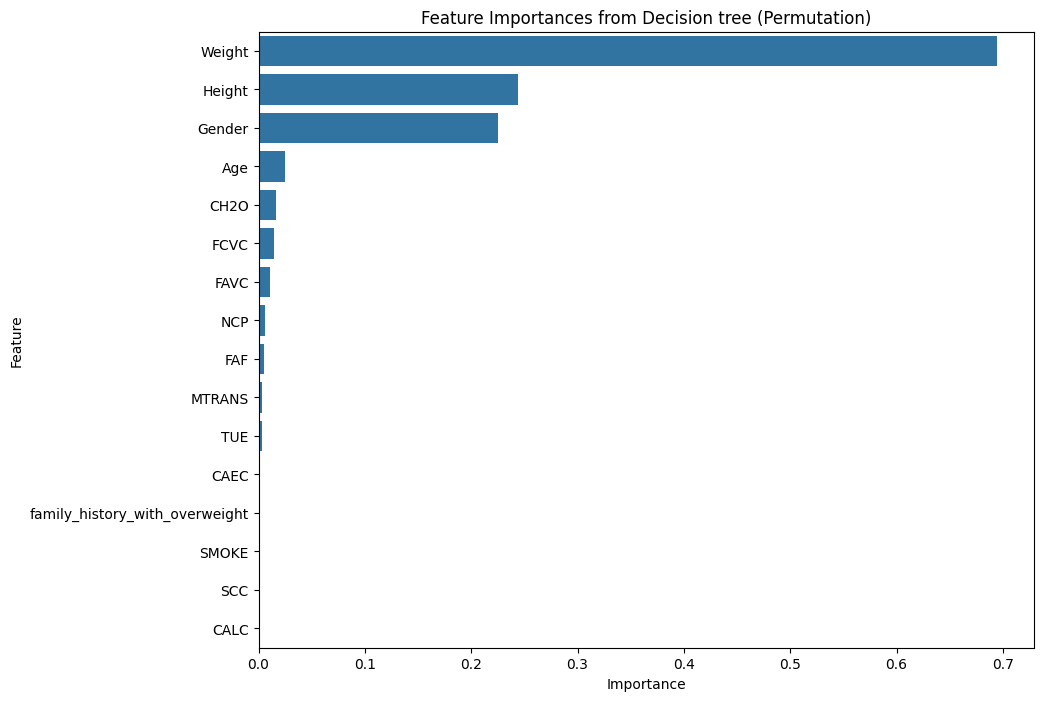

Top 5 important features:
    Feature  Importance
3   Weight    0.694090
2   Height    0.244208
0   Gender    0.225059
1      Age    0.024586
10    CH2O    0.016548


In [13]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate permutation importance
perm_importance = permutation_importance(dt, X_test, y_test, n_repeats=10, random_state=42)

# Extract and sort feature importances
importances = perm_importance.importances_mean
features = X.columns
feature_importances = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importances from Decision tree (Permutation)')
plt.show()

# Print the top 5 important features
print("Top 5 important features:\n", feature_importances.head())
